In [25]:
import pandas as pd
col = ["subid","Rotation_max","SpatialSpan_max", "FeatureMatch_max", "DoubleTrouble_max","Mental demand", "Physical demand", "Temporal demand", "Performance", "Effort", "Frustration", "AcousticSatisfaction", "ThermalSatisfaction", "TotalSatisfaction"]
data = pd.read_excel("../0_dataset_master/Experiment_edited_V5b.xlsx", usecols=col)

In [34]:
import pingouin as pg
import numpy as np
corr_arr = []
for i in col[1:]:
    temp = []
    for j in col[1:]:
        if i == j:
            temp.append(1)
        else:
            res = pg.rm_corr(data=data, x=i, y=j, subject='subid')
            temp.append(res["r"]["rm_corr"])
    corr_arr.append(temp)
corr_arr = pd.DataFrame(corr_arr, columns=col[1:], index=col[1:])

<Axes: >

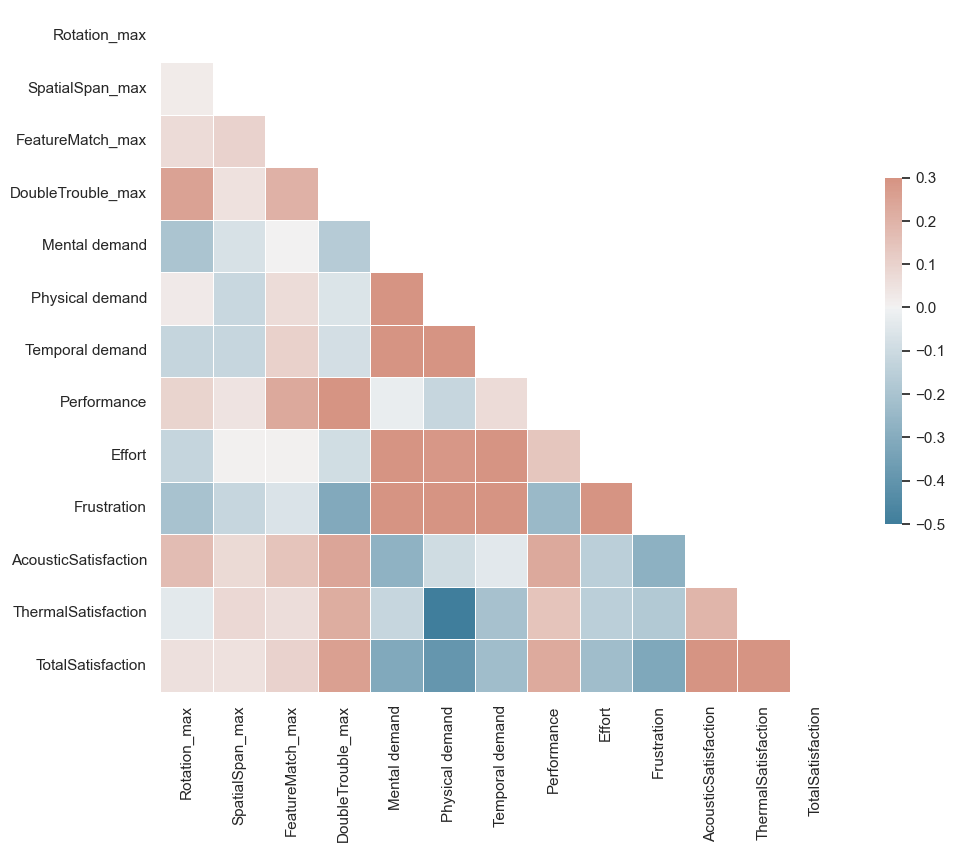

In [35]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_arr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_arr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})